### EDA on <a href="https://www.openml.org/search?type=data&sort=runs&id=42803&status=active">Road Safety Data</a>

This dataset is taken from <a href="https://www.openml.org/search?type=data&sort=runs&id=42803&status=active">Open ML</a>

**Data Description:** Data reported to the police about the circumstances of personal injury road accidents in Great Britain from 1979, and the maker and model information of vehicles involved in the respective accident. This version includes data up to 2015.

**Business Problem**:

In general, we would like to understand reason behind an accident i.e. is there any specific sitaution (say oversppeding, or road type, or any specific junction, etc...) that influence the accidents. 

**EDA Goals**:

We will approach our analysis w.r.to below common goals:

**1. Know Your Data**
   - Data volume
   - Columns and thier data types
   - Check data spread
   - Numeric vs Categorical Columns   

**2. Data Quality & Fix**
   - Check null values
   - delete irrelevant features
   - impute null values
   - check duplicates

**3. Data Content Analysis**
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation b/w features

**4. Derived Features/Metrics**

**5. Conclusion**

In [1]:
# Import all relevant libraries and check their version
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)

### 1. Know Your Data
    - Data volume
    - Columns and thier data types
    - Check data spread
    - Numeric vs Categorical Columns   


In [268]:
# Download the dataset from Open ML
data_set = fetch_openml(data_id=42803, as_frame=True)
df = data_set["frame"]
print("No. of rows = ", df.shape[0], "and no. of columns = ", df.shape[1])
print("Here is some sample records from top and bottom...")
df.head(3).append(df.tail(3))

No. of rows =  363243 and no. of columns =  67
Here is some sample records from top and bottom...


,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,1.0,19.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN
1,201501BS70002,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,5.0,3.0,9.0,9.0,0.0,0.0,2.0,0.0,1.0,3.0
2,201501BS70004,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,6.0,3.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,6.0
363240,2015984141415,13.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,5.0
363241,2015984141415,13.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,NaN
363242,2015984141415,13.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0


In [3]:
# Print all the Columns and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  float64
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriageway                  363084 non-nul

In [4]:
# Check Categorical and Numerical variables
pd.value_counts(df.dtypes)

float64    61
object      6
dtype: int64

In [5]:
# See all the columns that contain categorical data
cat_columns = list(df.select_dtypes(include="object"))
cat_columns

['Accident_Index',
 'Sex_of_Driver',
 'Date',
 'Time',
 'Local_Authority_(Highway)',
 'LSOA_of_Accident_Location']

In this section, lastly, we want to see how many unique values are there for each columns. This will be helpful to understand if we have any **binary data**, any **ordinal data** (usually 3-15), or any **continuous data** ( > 15). Based on this, we can later think of binning these continuous values.

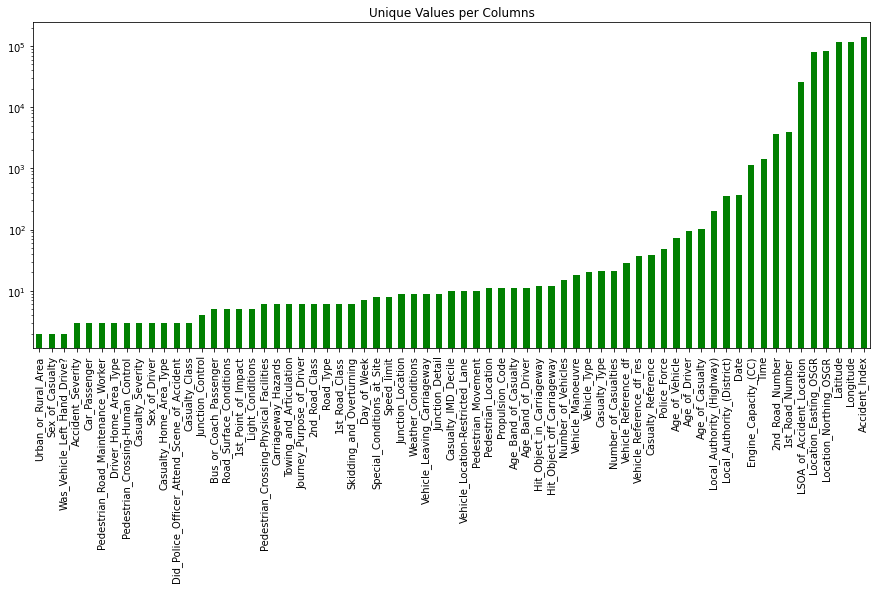

In [6]:
# For each numerical feature compute number of unique entries
unique_values = df.nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 6), title="Unique Values per Columns", color = "green");

In [7]:
# Lastly, we want to see the distrubution of data under each numerical columns

df.describe()

,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,363243.000000,363181.000000,362864.000000,363059.000000,363067.000000,363159.000000,363067.000000,363080.000000,363084.000000,363242.000000,...,357674.000000,363243.000000,363241.000000,363241.000000,362481.000000,363197.000000,363077.000000,363243.000000,323448.000000,293666.000000
mean,1.696203,9.756953,0.029766,12.607326,0.109233,2.609361,0.188139,0.307480,0.366689,0.546699,...,6.431284,2.875725,0.380731,0.276467,0.281027,0.066127,0.032833,7.840080,1.308186,5.107323
std,1.487094,8.315189,0.294127,6.218689,0.903131,3.249245,0.714243,1.595551,1.374107,2.094845,...,2.157860,0.355195,1.522220,1.294574,0.591239,0.493174,0.253780,7.366436,0.657776,2.829458
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,3.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


#### Conclusion of section 1. Know Your Data
Now, we have a good understanding of our data. We know that out data size is 363243 X 67. Some of these columns also have null values. We have 61 numerical features and 6 categorical features in our dataset. We have also seen their distributions and plotted their unique values.

### 2. Data Quality & Fix

    - Check duplicates
    - Check null values
    - Delete irrelevant features
    - Impute null values 
    - Outlier detection and removal

#### 2.1 Check duplicates
By now, we know that column **Accident_Index** is our unique key here. So while chcking the duplicates, we have to igore the unique key.

In [8]:
# Check if we have duplicates data records

duplicate_row = df.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print("No. of duplicates records: ", duplicate_row)

No. of duplicates records:  22


In [9]:
# Let's drop these 22 records from our data frame. We have to ensure that we do not consider the Index column
rel_columns_for_deletion = df.drop(labels=['Accident_Index'], axis=1).columns
df = df.drop_duplicates(subset=rel_columns_for_deletion)
print("Data Size is now:", df.shape)

Data Size is now: (363221, 67)


#### 2.2 Missing Values and Treatment

In [10]:
# Check the missing values % in each column
print(round(df.isnull().sum()/len(df.index), 3)*100)

Accident_Index                                  0.0
Vehicle_Reference_df_res                        0.0
Vehicle_Type                                    0.0
Towing_and_Articulation                         0.1
Vehicle_Manoeuvre                               0.1
Vehicle_Location-Restricted_Lane                0.0
Junction_Location                               0.0
Skidding_and_Overturning                        0.0
Hit_Object_in_Carriageway                       0.0
Vehicle_Leaving_Carriageway                     0.0
Hit_Object_off_Carriageway                      0.0
1st_Point_of_Impact                             0.1
Was_Vehicle_Left_Hand_Drive?                    0.4
Journey_Purpose_of_Driver                       0.0
Sex_of_Driver                                   0.0
Age_of_Driver                                   9.9
Age_Band_of_Driver                              9.9
Engine_Capacity_(CC)                           25.7
Propulsion_Code                                25.5
Age_of_Vehic

In [267]:
# Number of column having missing values
print("Number of Column that has NaN values: ", len((round(df.isnull().sum()/len(df.index), 3)*100)))

Number of Column that has NaN values:  54


So, we can notice that missing values ranges from 01.% to 47.9 %. Let's delete the columns that have more than 10% as null values.

In [269]:
# Let's check all the column where we have more than 12 % missing data
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 12]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 14
Index(['Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'LSOA_of_Accident_Location', 'Casualty_IMD_Decile'],
      dtype='object')


In [270]:
# Delete these 37 columns
df = df.drop(missing_columns, axis=1)
print(df.shape)
print("Number of Column that has NaN values now: ", len((round(df.isnull().sum()/len(df.index), 3)*100)))

(363243, 53)
Number of Column that has NaN values now:  53


Now, we also want to check the missing values per rows.

In [13]:
# checking whether some rows have missing values
df.isnull().sum(axis=1).sort_values(ascending = False)

271240    33
267316    33
284520    32
284523    31
284521    30
          ..
189926     0
189927     0
189928     0
82210      0
363242     0
Length: 363221, dtype: int64

Obviously, the above information is not very useful as we can not see the entire list. A better way to visulize this is using the library **missingno**

<AxesSubplot:>

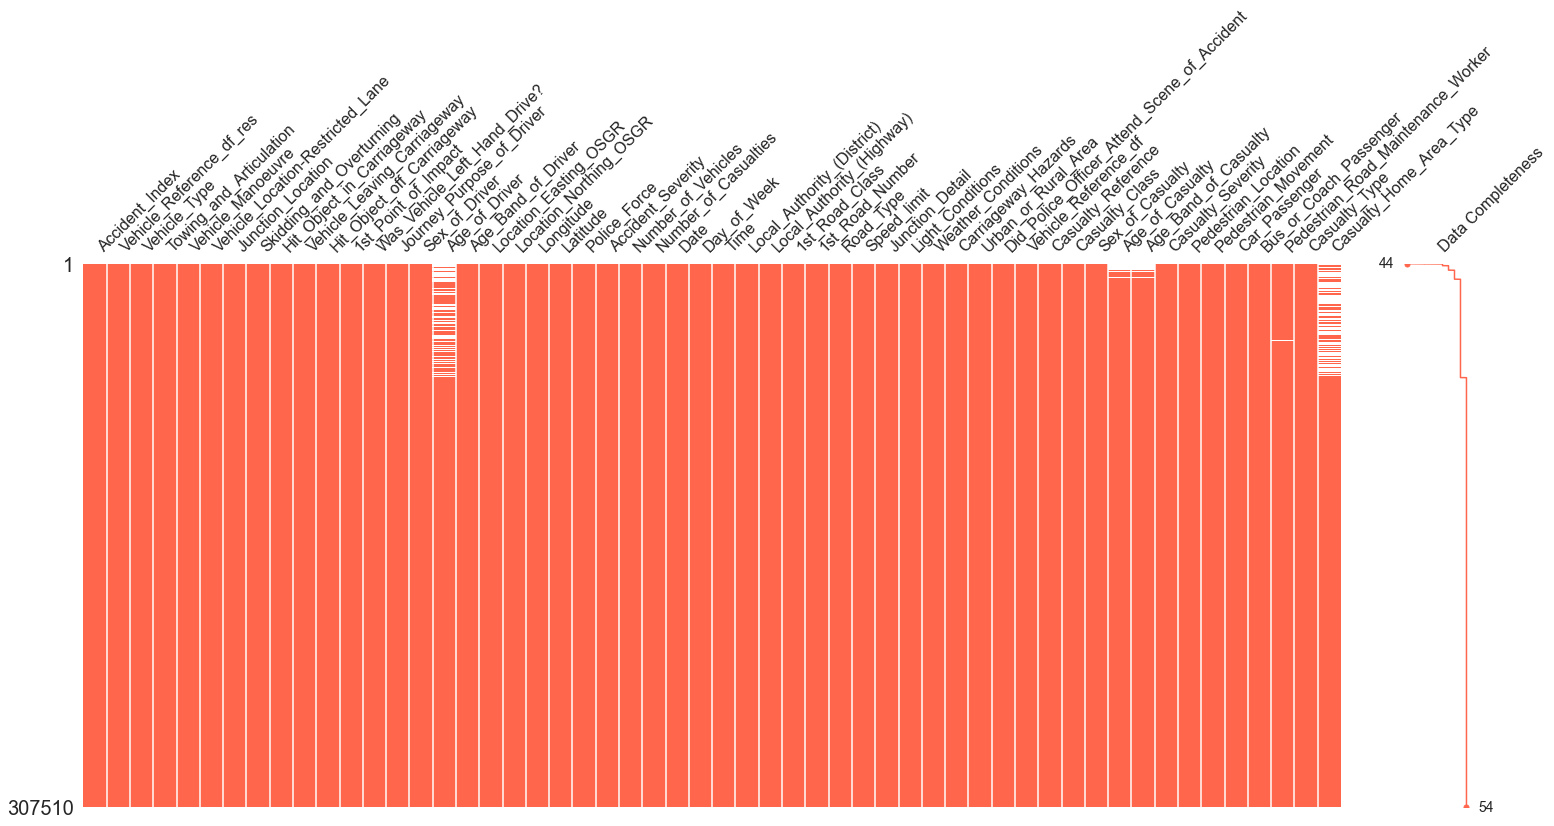

In [263]:
import missingno as msno
%matplotlib inline
msno.matrix(df, labels=True, sort="ascending", color=(1, 0.4, 0.3))

In [15]:
# We can see data completeness varies from 21 to 54%. Let's delete all rows having more than 20% values as null values
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

(319836, 54)

In [16]:
# Let's summarize the data again
print(round(df.isnull().sum()/len(df.index), 3)*100)

Accident_Index                                  0.0
Vehicle_Reference_df_res                        0.0
Vehicle_Type                                    0.0
Towing_and_Articulation                         0.1
Vehicle_Manoeuvre                               0.0
Vehicle_Location-Restricted_Lane                0.0
Junction_Location                               0.0
Skidding_and_Overturning                        0.0
Hit_Object_in_Carriageway                       0.0
Vehicle_Leaving_Carriageway                     0.0
Hit_Object_off_Carriageway                      0.0
1st_Point_of_Impact                             0.1
Was_Vehicle_Left_Hand_Drive?                    0.5
Journey_Purpose_of_Driver                       0.0
Sex_of_Driver                                   0.0
Age_of_Driver                                  10.0
Age_Band_of_Driver                             10.0
Location_Easting_OSGR                           0.0
Location_Northing_OSGR                          0.0
Longitude   

We can see that missing values have come down to a max. of 11.4%. Our aim is now to impute these values. Although there is no rule that whether you should delete the irrelevant features first or whether you should delete the irrelevant rows. I usually prefer to delete the fatures first and then delete rows with substatntial missing values.

<AxesSubplot:>

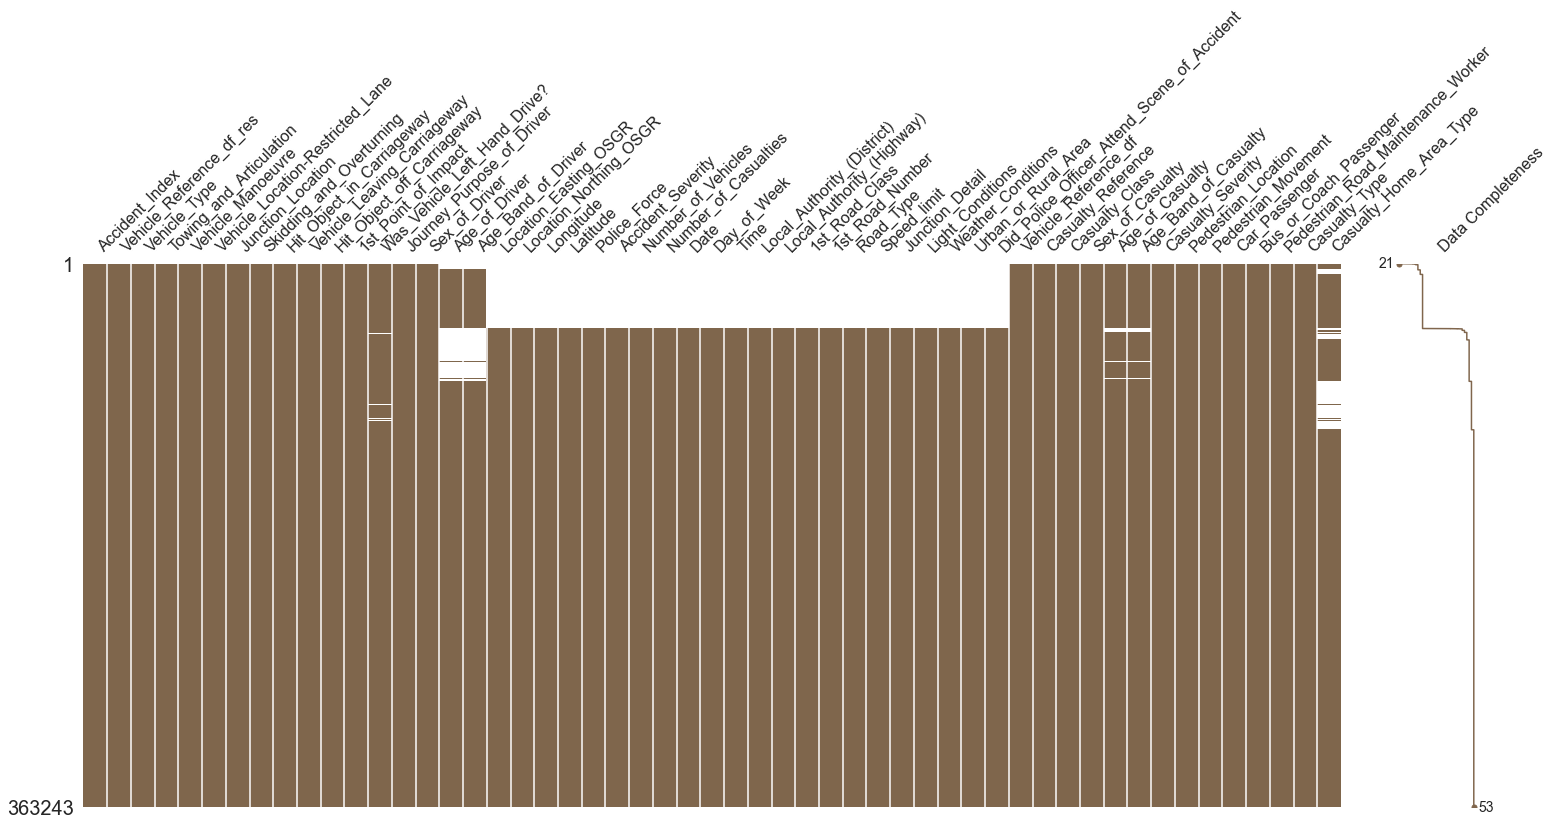

In [272]:
# We can notice that overall data completeness is increased now.
import missingno as msno
%matplotlib inline
msno.matrix(df, labels=True, sort="ascending", color=(0.5, 0.4, 0.3))

####  2.3 Imputing null values

In [18]:
# Let's print the toatl numbers of missing values for all columns in descending order
df.isnull().sum().sort_values(ascending=False)

Casualty_Home_Area_Type                        36562
Age_Band_of_Driver                             32048
Age_of_Driver                                  32048
Age_of_Casualty                                 5042
Age_Band_of_Casualty                            5042
Was_Vehicle_Left_Hand_Drive?                    1483
Car_Passenger                                    443
Towing_and_Articulation                          350
Carriageway_Hazards                              198
1st_Point_of_Impact                              171
Vehicle_Manoeuvre                                150
Vehicle_Location-Restricted_Lane                 146
Skidding_and_Overturning                         140
Hit_Object_in_Carriageway                        130
Vehicle_Leaving_Carriageway                      126
Pedestrian_Road_Maintenance_Worker                82
Sex_of_Casualty                                   72
Location_Easting_OSGR                             69
Location_Northing_OSGR                        

As we can see that we have quite a few columns where we have the missing values.Imputing the null values is not so simple and the data must be analyzed before we make decision on how to impute the null values. Just for demnstration purpose, I'll discuss couple of examples here:

 - Time
 - Vehicle_Type
 - Longitude
 - Age_Band_of_Driver

####  Imputing null values: Time

In [19]:
# Features: Time
print(df.Time.dtypes)
print(df["Time"].value_counts())
print(df.Time.describe())


object
17:30    2971
17:00    2934
18:00    2720
16:30    2699
16:00    2681
         ... 
04:37       3
04:26       3
02:48       3
02:41       2
04:04       2
Name: Time, Length: 1439, dtype: int64
count     319792
unique      1439
top        17:30
freq        2971
Name: Time, dtype: object


Here, we can observe that **Time** is a categorical variables and most of the accidents occurs in the evening. So, in this case, we can think of imputing the null values with **mode** or most frequntly used value.

In [20]:
# impute missing values in Time with mode.
print(df.Time.mode()[0])
df.Time=df.Time.fillna(df.Time.mode()[0])

# Check the nul values in Time
df.Time.isnull().sum()

17:30


0

####  Imputing null values: Vehicle Type

float64
9.0     238528
1.0      17768
19.0     16966
3.0       9030
8.0       7045
11.0      7041
5.0       6975
21.0      5982
4.0       2159
2.0       2025
20.0      1922
90.0      1587
10.0       801
98.0       787
17.0       600
97.0       255
22.0       188
16.0       100
18.0        20
23.0         8
Name: Vehicle_Type, dtype: int64
count    319787.000000
mean          9.783321
std           8.491160
min           1.000000
25%           9.000000
50%           9.000000
75%           9.000000
max          98.000000
Name: Vehicle_Type, dtype: float64


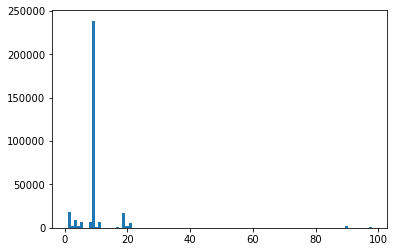

In [21]:
# Features: Vehicle Type
print(df["Vehicle_Type"].dtypes)
print(df["Vehicle_Type"].value_counts())
print(df["Vehicle_Type"].describe())

plt.hist(df["Vehicle_Type"], bins = 100)
plt.show()

This is very interesting. The data type for Vehicle Type is numeric, so ideally we should use mean or median to impute the null values. However, I guess that will be wrong. Vehicle Type has certain categories ( 1 to 98) and most of accidents occured with vehicle type 9. In this case, it make sense to impute the missing values with vehicle type 9 i.e. mode.

In [22]:
# impute missing values in Vehicle Type with mode.
print(df.Vehicle_Type.mode()[0])
df.Vehicle_Type=df.Vehicle_Type.fillna(df.Vehicle_Type.mode()[0])

# Check the nul values in Time
df.Vehicle_Type.isnull().sum()

9.0


0

####  Imputing null values: Longitude

float64
-1.200828    1332
-3.335369     175
-4.270667      96
-3.348646      91
 0.139632      83
             ... 
 0.513590       1
 0.308103       1
-2.287385       1
 1.153389       1
-0.198465       1
Name: Longitude, Length: 117581, dtype: int64
count    319767.000000
mean         -1.517805
std           1.369033
min          -7.422915
25%          -2.429081
50%          -1.480870
75%          -0.289731
max           1.758443
Name: Longitude, dtype: float64


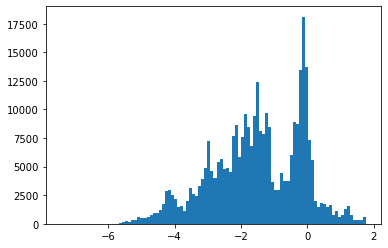

In [23]:
# Analyze Features: Vehicle Type
print(df["Longitude"].dtypes)
print(df["Longitude"].value_counts())
print(df["Longitude"].describe())

plt.hist(df["Longitude"], bins = 100)
plt.show()

The feature **Longitute** is a numeric feature. The graph doesn't show a gaussian distribution, but mean and median is very similar (mean = -1.51, median = -1.48). In this case, we can impute the missing information **either with mean or median.**
I am going ahead with mean.

In [24]:
# impute missing values in Longitude with Mean.
print(df.Longitude.mean())
df.Longitude=df.Longitude.fillna(df.Longitude.mean())

# Check the nul values in Time
df.Longitude.isnull().sum()

-1.51780510291552


0

####  Imputing null values: Age Band of Driver

float64
6.0     67359
7.0     56623
8.0     51149
5.0     36895
9.0     28224
4.0     23081
10.0    14149
11.0     8411
3.0      1420
2.0       413
1.0        64
Name: Age_Band_of_Driver, dtype: int64
count    287788.000000
mean          6.878963
std           1.748426
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: Age_Band_of_Driver, dtype: float64


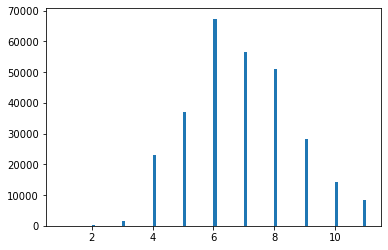

In [25]:
# Analyze Features: Age_Band_of_Driver
print(df["Age_Band_of_Driver"].dtypes)
print(df["Age_Band_of_Driver"].value_counts())
print(df["Age_Band_of_Driver"].describe())

plt.hist(df["Age_Band_of_Driver"], bins = 100)
plt.show()

Again, this is a numeric features, but the values take some distinct value between 1 - 11. A mean band of 6.8 doesn't make any sense, so we should impute the values with median (band = 7) or mode (band = 6). I will impute the values with mode here.

In [26]:
# impute missing values in  Age_Band_of_Driver with mode.
print(df.Age_Band_of_Driver.mode()[0])
df.Age_Band_of_Driver=df.Age_Band_of_Driver.fillna(df.Age_Band_of_Driver.mode()[0])

# Check the nul values in Time
df.Age_Band_of_Driver.isnull().sum()

6.0


0

#### Note on Imputing Missing Values:
To keep this notebook short, I am not going to impute any other missing values, however, each and every columns must be analyzed and the missing values must be imputed. In case there is no clue on how to impute the values, you can also create a dummy category/value and park the missing values there. 

#### 2.4 Outliers Detection and Removal

In order to identify outliers, we can describe the dataframe and look at the **mean and std** value. Any data point beyond the range (- mean+3*std, mean+3*std) is considered as the outliers.

Alternatively, we can also plot the box plots and visually see any outliers.
In order to remove the outliers, we can either use **IQR method** or **Z-Score method**.

In [27]:
df.describe()

,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
count,319836.000000,319836.000000,319486.000000,319686.000000,319690.000000,319768.000000,319696.000000,319706.000000,319710.000000,319836.000000,...,314794.000000,314794.000000,319836.000000,319834.000000,319834.000000,319393.000000,319816.000000,319754.000000,319836.000000,283274.000000
mean,1.695122,9.783201,0.030521,12.595753,0.109175,2.667778,0.184669,0.317867,0.365760,0.555735,...,37.038161,6.420322,2.877281,0.384496,0.276959,0.284299,0.068242,0.036700,7.834409,1.307833
std,1.541980,8.490515,0.296915,6.212312,0.901354,3.277303,0.708728,1.621788,1.374664,2.119626,...,18.205412,2.152745,0.354180,1.521042,1.288401,0.593665,0.500087,0.268084,7.451068,0.656493
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,49.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,104.000000,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000


Looking at the above output, It seems that the columns **Vehicle_Reference_df_res** and **Vehicle_Type** have some outliers - a rough calculation of mean+3*std. Let's plot the box plots for these two columns to re-confirm our findings.

__Remove Outliers using IQR Method__

  Features: **Vehicle_Reference_df_res**

<AxesSubplot:xlabel='Vehicle_Reference_df_res'>

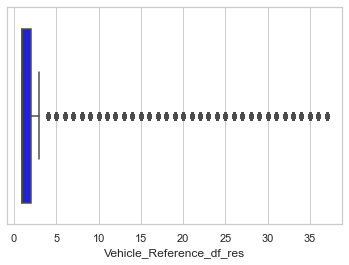

In [28]:
sns.set_theme(style="whitegrid")
sns.boxplot(x = df['Vehicle_Reference_df_res'], orient = "h", color = "blue")

In [29]:
# Before we remove outliers, let's see the dataset shape
print(df.shape)

(319836, 54)


In [30]:
Q1 = df['Vehicle_Reference_df_res'].quantile(0.25)
Q3 = df['Vehicle_Reference_df_res'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)

# Remove Outliers
df = df[~((df['Vehicle_Reference_df_res'] < (Q1 - 1.5 * IQR)) |(df['Vehicle_Reference_df_res'] > (Q3 + 1.5 * IQR)))]
# Check dataframe shape again
print(df.shape)

IQR:  1.0
(310040, 54)


We can see that 9,796 records have been dropped from the dataset. We can verify this by looking at the  data distribution again for this column.

count    310040.000000
mean          1.542333
std           0.627573
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: Vehicle_Reference_df_res, dtype: float64


<AxesSubplot:xlabel='Vehicle_Reference_df_res'>

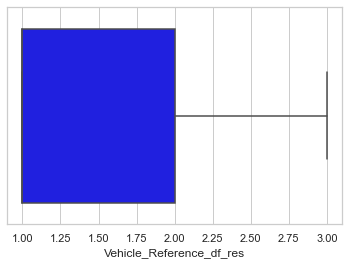

In [31]:
print(df['Vehicle_Reference_df_res'].describe())
sns.set_theme(style="whitegrid")
sns.boxplot(x = df['Vehicle_Reference_df_res'], orient = "h", color = "blue")

And the data for this columns looks much closer now (i.e. outliers are not present anymore).

__Remove Outliers using Z-score Method__

 Features: **Vehicle_Type**

   Here we will make use of library scipy to calculate the z-score.

<AxesSubplot:xlabel='Vehicle_Type'>

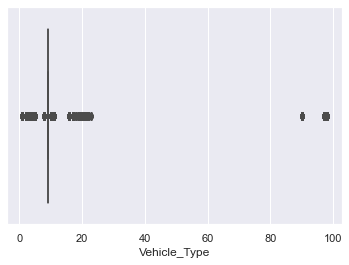

In [32]:
sns.set_theme(style="darkgrid")
sns.boxplot(x = df['Vehicle_Type'], orient = "h")

In [33]:
from scipy import stats
print("Dataframe shape before outiers removal:", df.shape)
z_score= np.abs(stats.zscore(df['Vehicle_Type']))

# Remove outliers
df = df[(z_score<3)]

print("Dataframe shape after outiers removal:", df.shape)

Dataframe shape before outiers removal: (310040, 54)
Dataframe shape after outiers removal: (307510, 54)


#### Conclusion of section 2. Data Quality & Fix

Handling data quality issue is very subjective and most often it is not easy and straight forward. It also depends highly on the dataset and the domain specific knowledge. One has to spend some time here analyzing the entire dataset fature by feature and making a call what to delete, what to impute, and what to categorize as outliers.

**Before Proceeding Forward:** I have not checked and fixed all the columns here and there must be some garbage. My idea is to show you the way to handle certain issue, and the same must be applied on the entire dataset. To keep the data clean, I will remove remaining Nan values from the dataset.

In [34]:
print("Data Size before:", df.shape)
df1=df.dropna().reset_index(drop=True)
print("Post deletion datasize:", df1.shape)

Data Size before: (307510, 54)
Post deletion datasize: (243028, 54)


In [35]:
# Final Confirmation that we do not have any null values in our dataset
df1.isnull().sum().sort_values(ascending=False)


Accident_Index                                 0
Vehicle_Reference_df                           0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Light_Conditions                               0
Weather_Conditions                             0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Casualty_Reference                             0
Vehicle_Reference_df_res                       0
Casualty_Class                                 0
Sex_of_Casualty                                0
Age_of_Casualty                                0
Age_Band_of_Casualty                           0
Casualty_Severity                              0
Pedestrian_Location 

### 3. Data Content Analysis

So far, we have looked into general structure and quality of our dataset. Time now to go a little deeper and see how the actual content looks like. Honestly, we should analyze the entire dataset feature by feature, but this becomes very cumbersome when we have more than 15-20 features. So, what's the best way to analyze the content then?

This is why I kept saying that domain knowledge is very important. Let's see how. In this exercise, we are analyzing the data about road accidents and some of the questions that automatically come to our mide is:

- How is the data distrbuted w.t.to different Accident Severity? 
- Do we have more accidents on weekdays or weekends?
- Any specific months having more accidents?
- How the Casualities looks like Round the clock?
- Any relationship between Accidents and Speed limit, or between Accidents and Road type, or between Accidents and Junction Type?
- Does Weather have any effect on accidents?
- Does Rural and Urban area gets similar accidents number?
 .... and many more.
 
 So, in this exercise, we are going to at least answer the above questions.


In [36]:
# Before we process forward, it is worth checking the unique values for Date and Time columns
print(len(df1.Date.unique()))
print(len(df1.Time.unique()))
print(len(df1.Number_of_Casualties.unique()))

365
1439
20


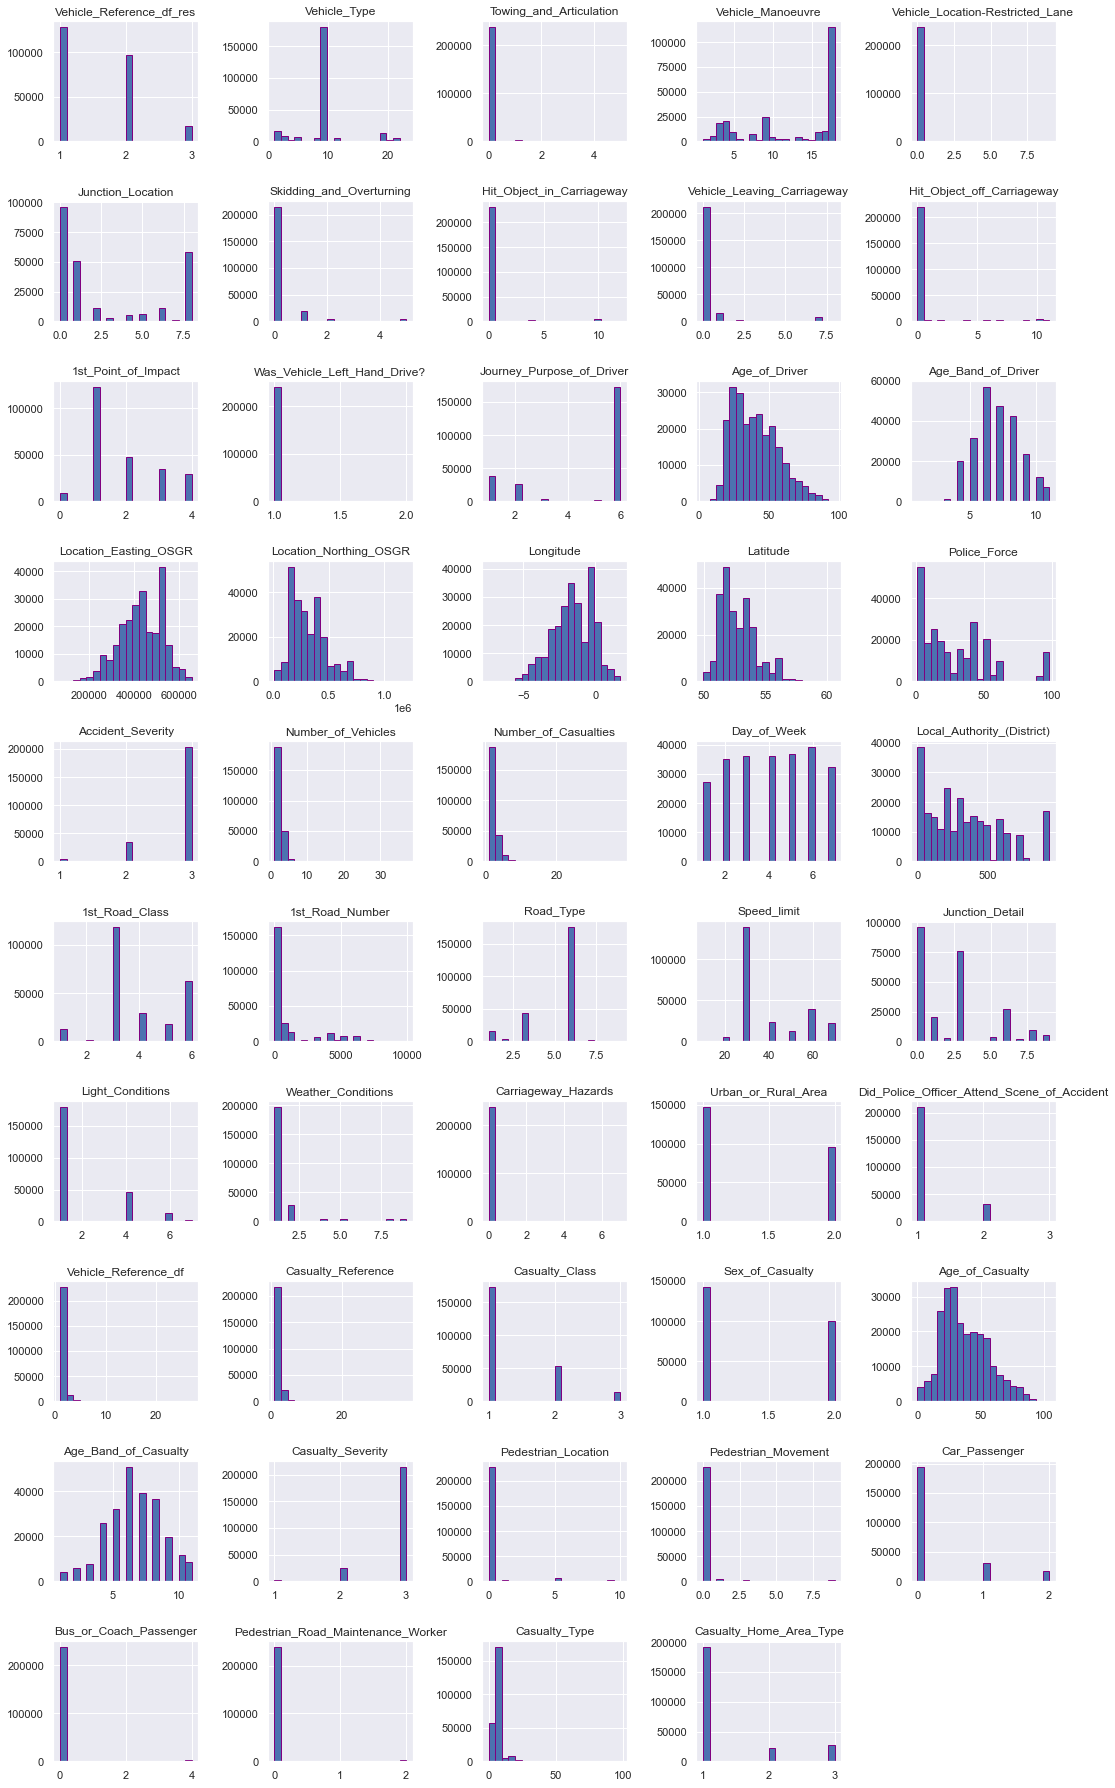

In [37]:
df1.hist(bins=20, figsize=(15, 25), layout=(-1, 5), edgecolor="purple")
plt.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.


- The above graphs already answer some of the questions related to Vehicle type, junction type, casualty severity, light condition, weather conditions etc...
- We also observed that some of the features is heavily represented by by 1 or 2 values. For example, `Towing_and_Articulation,
Skidding_and_Overturning, Vehicle_Location-Restricted_Lane, Hit_Object_in_Carriageway, Hit_Object_off_Carriageway, Was_Vehicle_Left_Hand_Drive?`

**How is Accident Severity and Number of Casualties related to each other?**

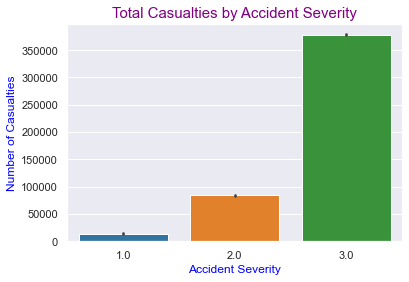

In [217]:
sns.barplot(x='Accident_Severity',
            y='Number_of_Casualties',
            data=df1,
            estimator=np.sum, palette="tab10")
plt.title("Total Casualties by Accident Severity", fontsize = 15, color = 'purple')
plt.ylabel("Number of Casualties", color = 'blue')
plt.xlabel("Accident Severity", color = 'blue')
plt.show()

**How is Accident Severity and Number of Total number of Accidents related to each other?**

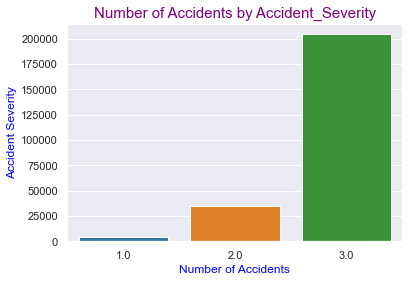

In [219]:
sns.countplot(x='Accident_Severity', data=df1,palette="tab10" )
plt.title('Number of Accidents by Accident_Severity', fontsize = 15, color='purple')
plt.xlabel("Number of Accidents", color = 'blue')
plt.ylabel("Accident Severity", color = 'blue')
plt.show()

**Do we have more accidents on weekdays or weekends?**

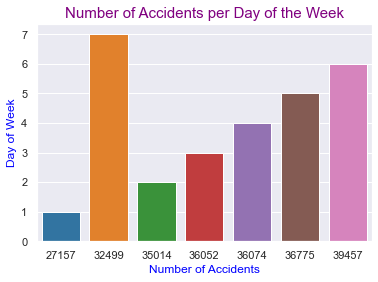

In [220]:
sns.barplot(x='Accident_Index', y='Day_of_Week', palette="tab10", data=df1.groupby('Day_of_Week')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
plt.title("Number of Accidents per Day of the Week", fontsize = 15, color = 'purple')
plt.ylabel("Day of Week", color = 'blue')
plt.xlabel("Number of Accidents", color = 'blue')
plt.show()

**Number of Accident:**
 - per Road Type
 - per Junction Type
 - per Speed Limit
 - per Weather Type
 - per Light Condition
 - Urban vs Rural
 

In [201]:
col_list = ['Road_Type', 'Junction_Detail', 'Speed_limit', 'Weather_Conditions', 'Light_Conditions', 'Urban_or_Rural_Area']


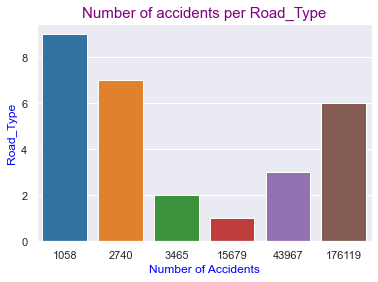

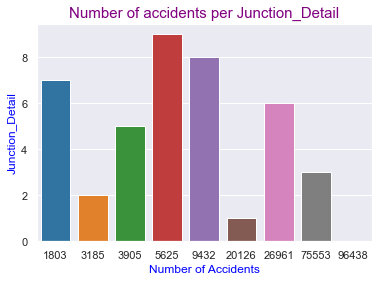

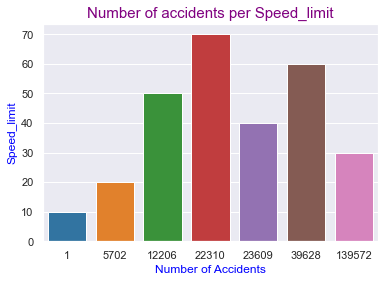

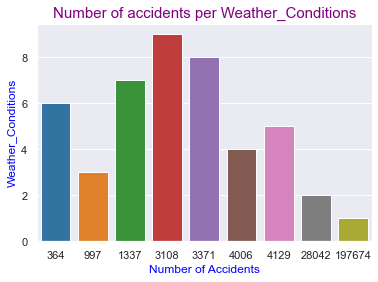

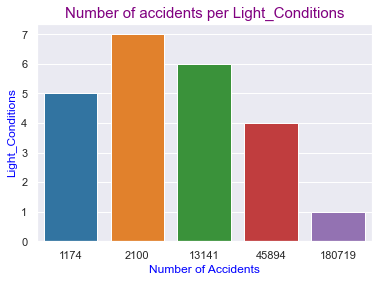

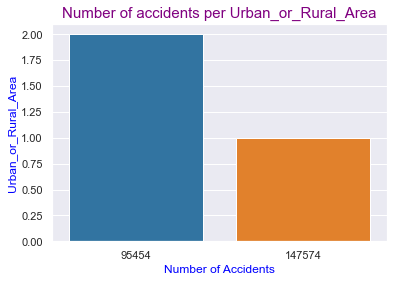

In [222]:
for col in col_list:
    sns.barplot(x='Accident_Index',y=col, palette="tab10", 
                data=df1.groupby(col)['Accident_Index'].
                count().reset_index().sort_values(by='Accident_Index'))
    plt.title("Number of accidents per {}".format(col), fontsize = 15, color = 'purple')
    plt.ylabel(col, color = 'blue')
    plt.xlabel("Number of Accidents", color = 'blue')
    plt.show()

Although we can see the distribution of accidents for Urban vs Rural area in the bar chart, a better representation for such category might be through pie chart.

In [160]:
data=df1.groupby('Urban_or_Rural_Area')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index')
data

,Urban_or_Rural_Area,Accident_Index
1,2.0,95454
0,1.0,147574


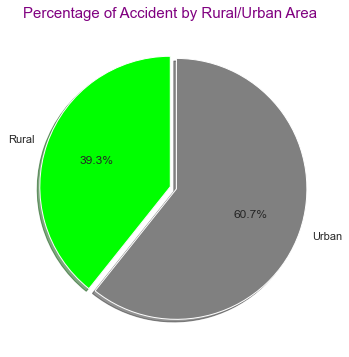

In [240]:
my_color = ['Lime','grey']
my_lable = ["Rural" , "Urban"]
explode = (0, 0.05) 
fig = plt.figure(figsize=(6,6), facecolor='white')
plt.title('Percentage of Accident by Rural/Urban Area',color = 'purple',fontsize = 15)
plt.pie(data.Accident_Index, explode = explode, labels = my_lable, colors = my_color, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

**Plots the pairplot for Numerical vs Numerical Columns**

This will helps to check for any correletaion between various numerical features.

In [43]:
# As we have too many features, we will select only few features for demonstration purpose.

num_col = ['1st_Point_of_Impact','Age_of_Driver', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
            'Longitude', 'Latitude', 'Number_of_Vehicles', 'LSOA_of_Accident_Location', 'Pedestrian_Location',
            'Car_Passenger', 'Casualty_Reference']

df_num = df1.reindex(columns=num_col)

In [254]:
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple','xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve', 'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon', 'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple', 'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish', 'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green', 'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple', 'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish', 'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green', 'xkcd:purple blue', 'xkcd:baby shit green','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple', 'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish', 'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green', 'xkcd:purple blue', 'xkcd:baby shit green','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple','xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve', 'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon', 'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green', 'xkcd:purple blue', 'xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple','xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve', 'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon', 'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple', 'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish', 'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green', 'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple', 'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish', 'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green', 'xkcd:purple blue', 'xkcd:baby shit green','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple', 'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish', 'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green', 'xkcd:purple blue', 'xkcd:baby shit green','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple','xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve', 'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon', 'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green', 'xkcd:purple blue'])

def modified_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)
    

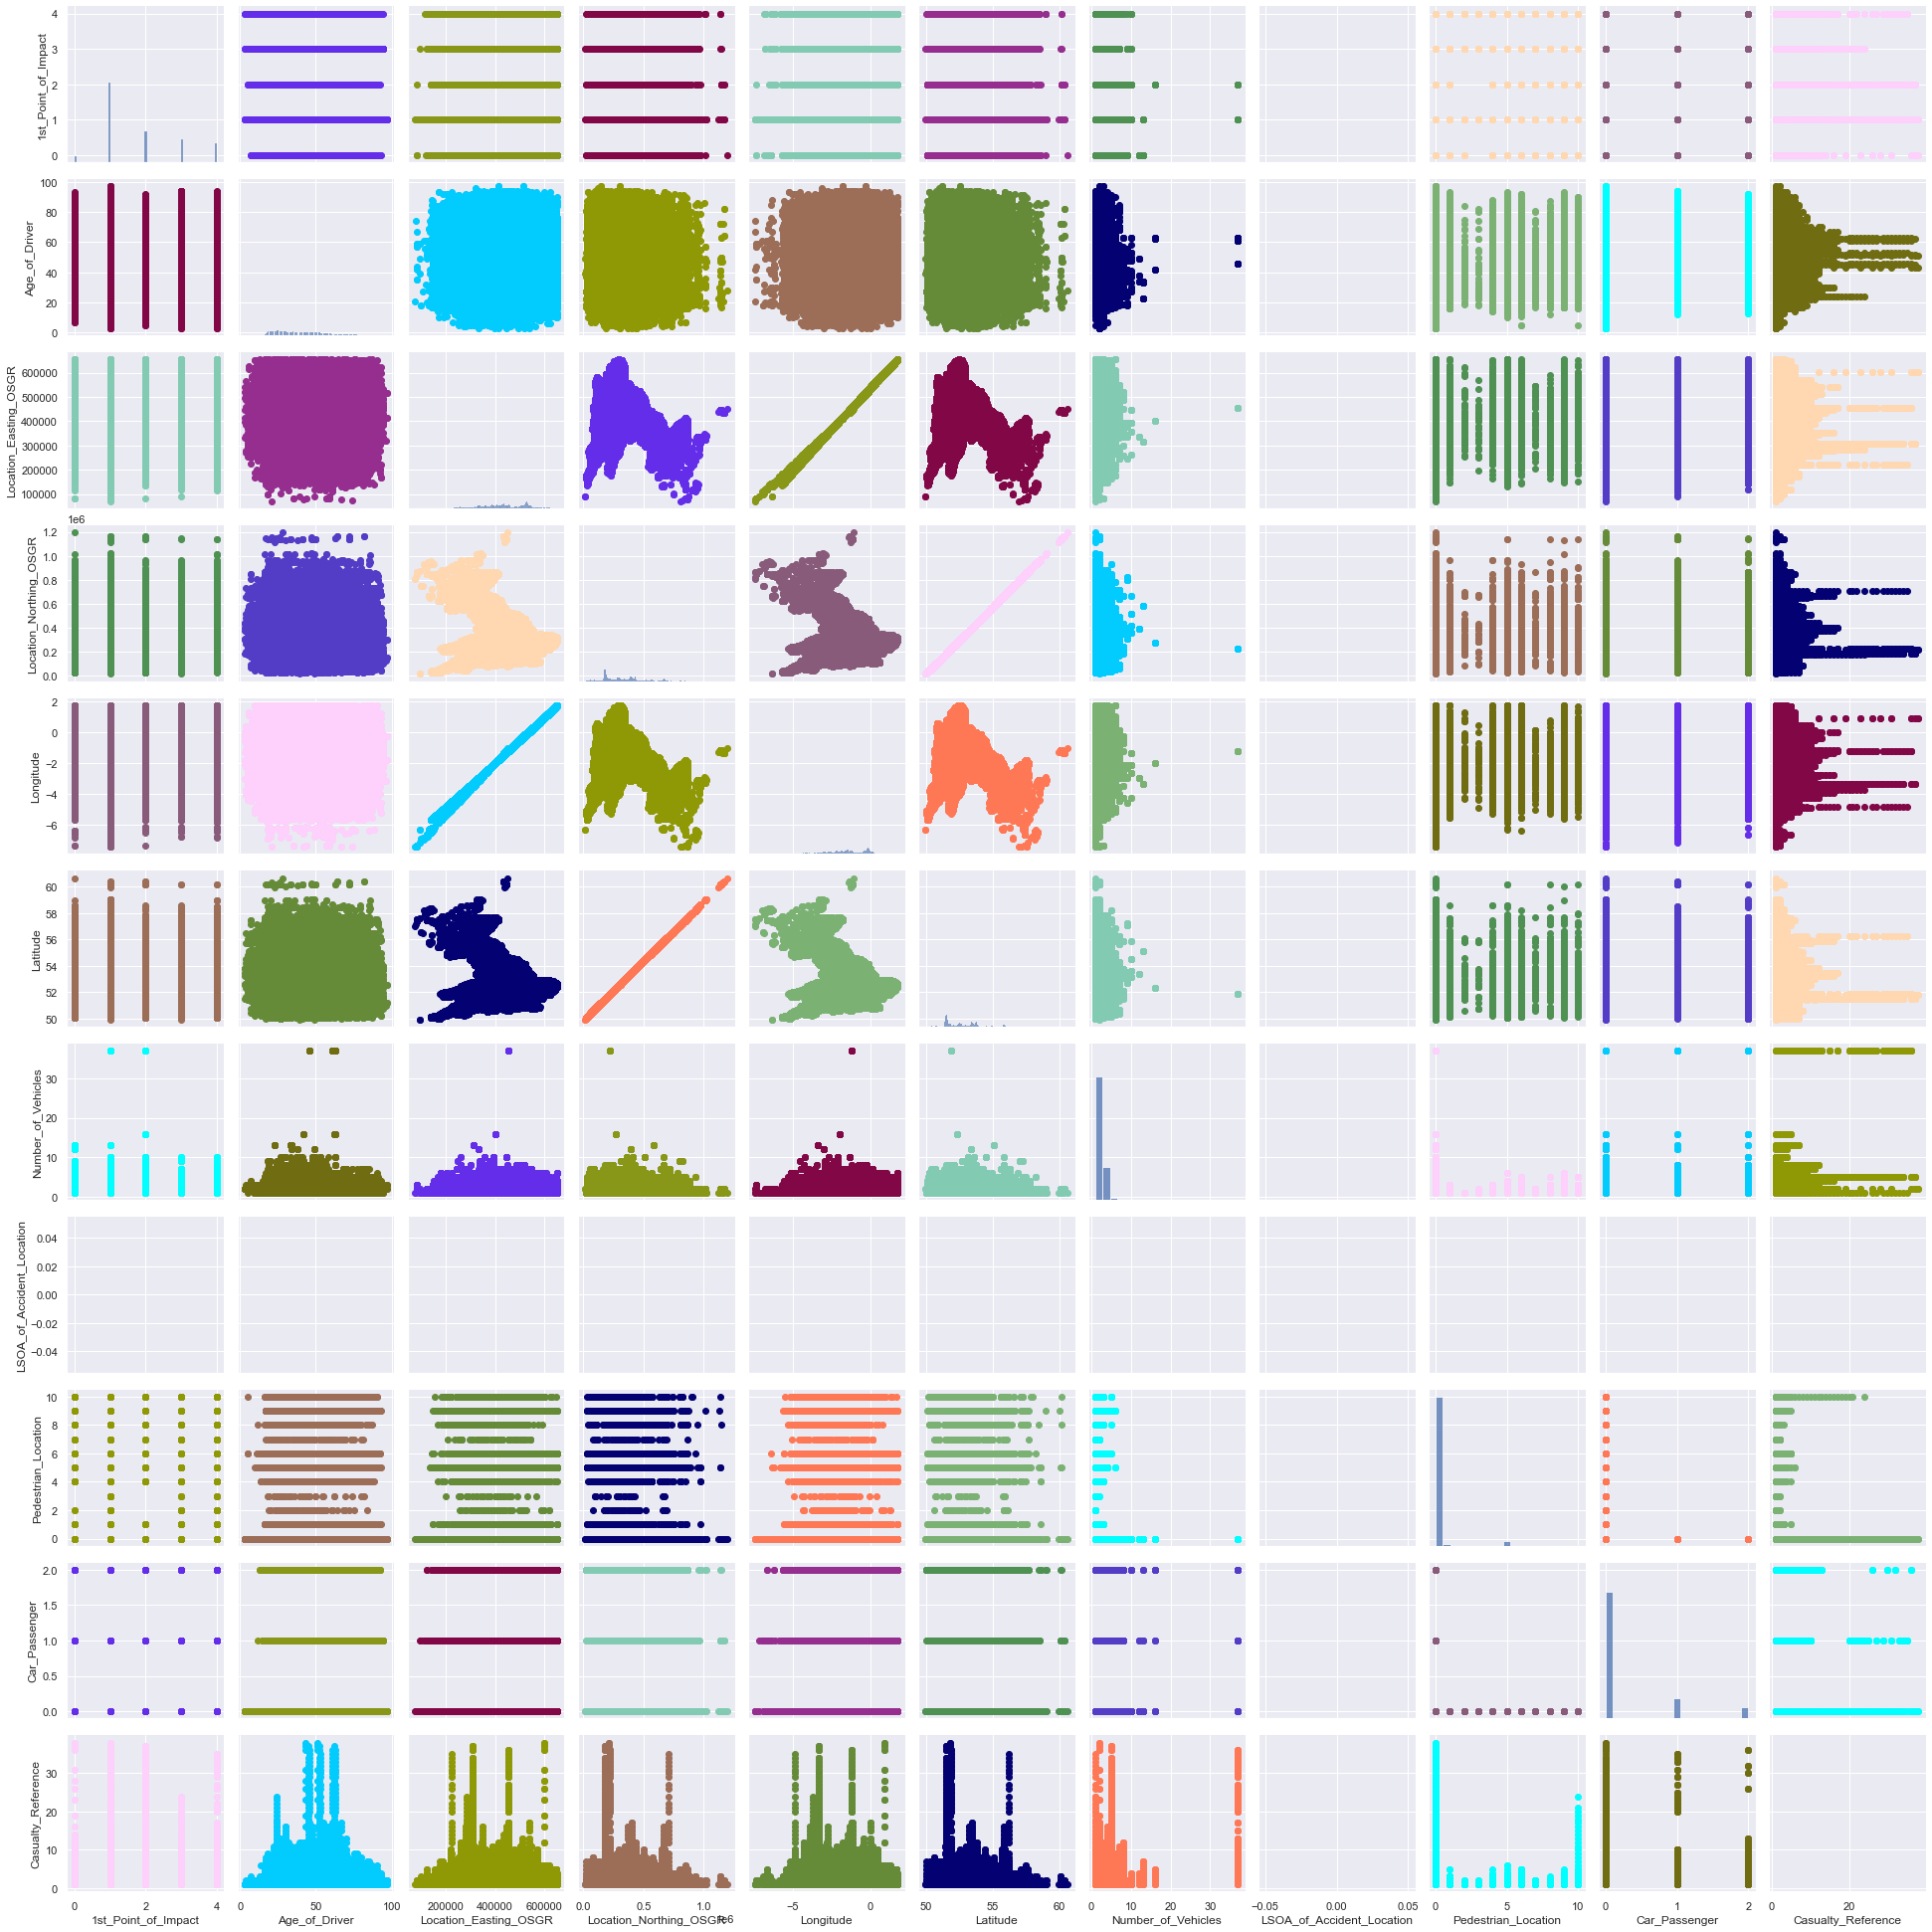

In [255]:
# Pairwise scatter plot
g = sns.pairplot(df_num)
g.map_offdiag(modified_scatter)
plt.show()

**Check for Features that are correlated to each Other**

In [45]:
# Computes feature correlation
df_corr = df1.corr(method="pearson") # Pearson correlation evaluates the linear relationship b/w two variables

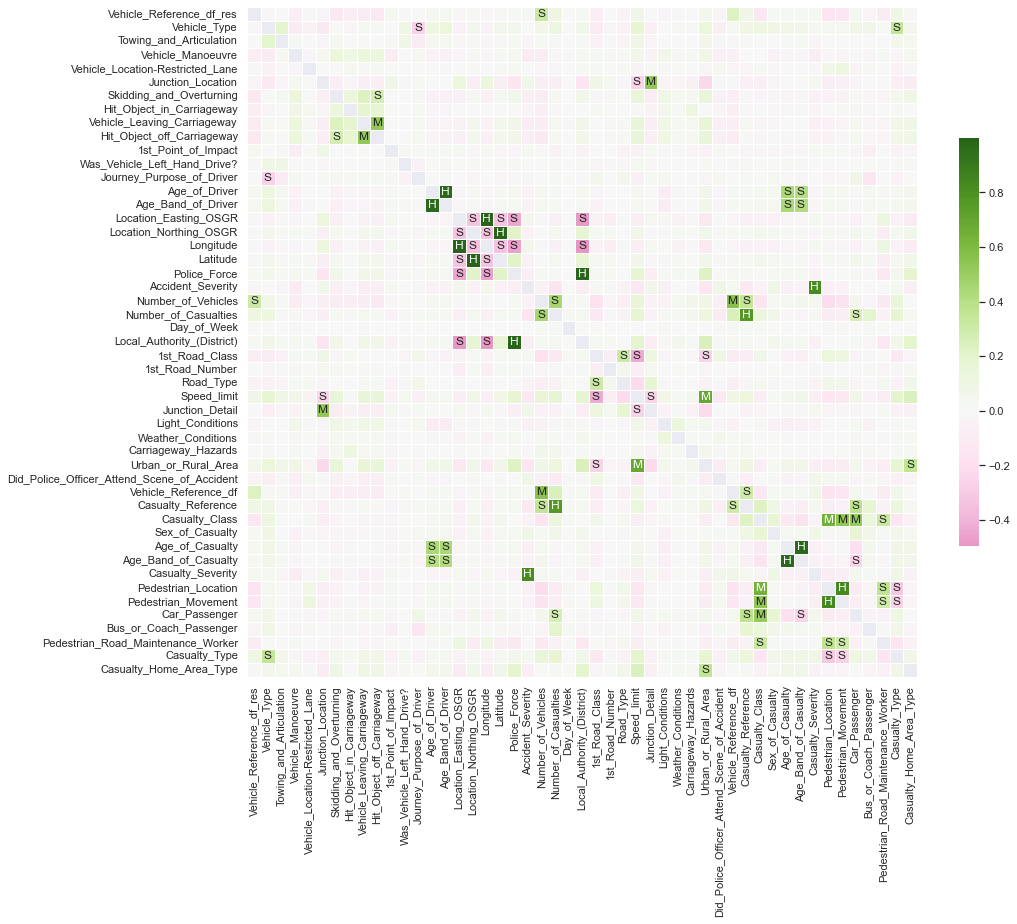

In [47]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "H",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "S", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="PiYG", cbar_kws={"shrink": 0.5});

Our dataset has `Date, Day_of_Week,` and `Time` information. We do not have year or Month information. So, in order to analyze the data with respect to temporal dimension, we would derive some additional features and continue with our analysis.
                                 

### 3. Data Content Analysis

So far we have seen our data from data structure and quality perspective, and we have also analyzed the data content to certain extent.
However, we have not yet seen any monthly trend because we do not have month is our data. We will derive `Month` and few more features and analyze our data.

**Add new features like Week Day, Month, Hours**

In [69]:
df1.Date = pd.to_datetime(df1.Date)  #Convert Date col frm Object to Date Time type
df1.Time = pd.to_datetime(df1.Time)

In [70]:
#Add month column
df1['Month'] = df1['Date'].dt.month

#Add month column
df1['Year'] = df1['Date'].dt.year

#Add hour column - accidents hours
df1['Hour'] = df1['Time'].dt.hour

# Add weekname column
df1['Week_Name'] = df1['Date'].dt.day_name()

#check date_time, month and hour column
df1[['Date', 'Year', 'Month', 'Hour', 'Week_Name']].head()

,Date,Year,Month,Hour,Week_Name
0,2015-12-01,2015,12,18,Tuesday
1,2015-09-01,2015,9,7,Tuesday
2,2015-01-15,2015,1,9,Thursday
3,2015-01-15,2015,1,9,Thursday
4,2015-01-15,2015,1,9,Thursday


**Weekly, Monthly, Hourly Trend of Accidents**

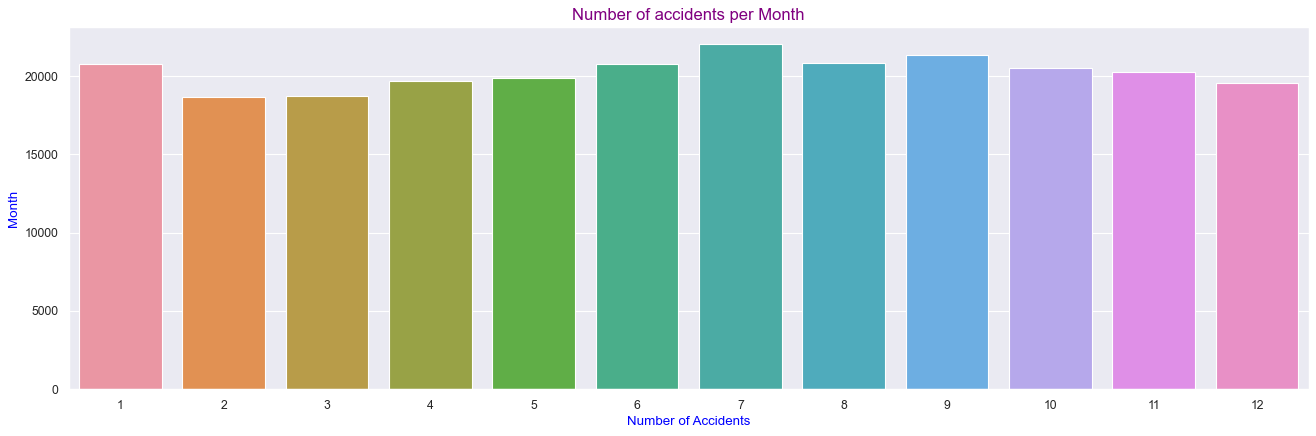

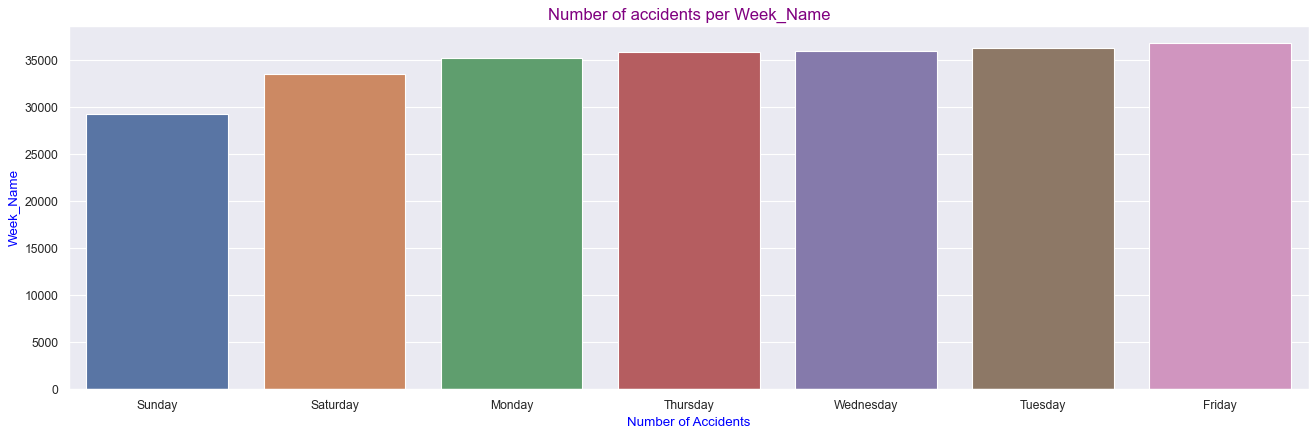

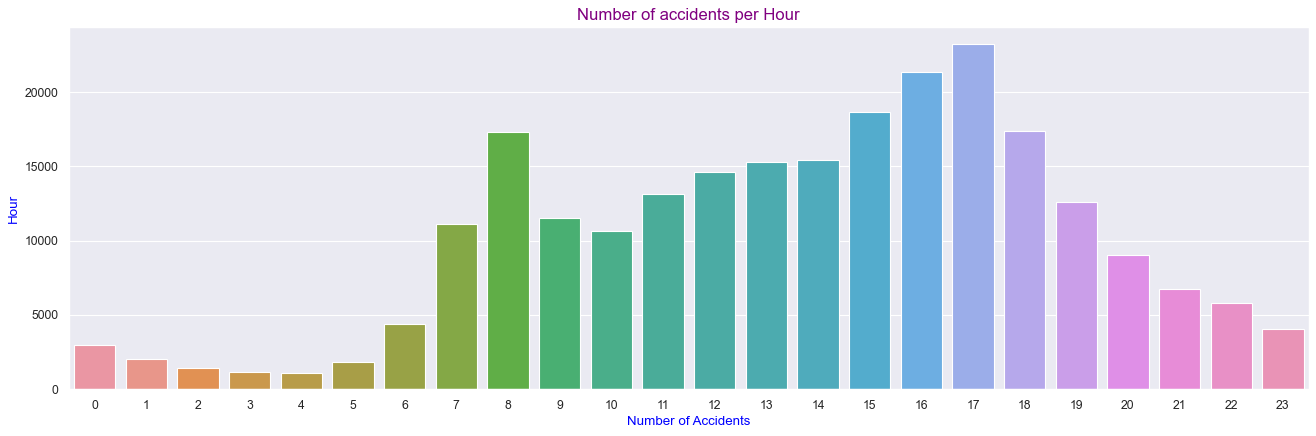

In [89]:
col_time = ['Month', 'Week_Name', 'Hour']

for col in col_time:
    plt.figure(figsize = (20, 6), dpi = 80)    
    sns.barplot(y='Accident_Index',
                x=col,
                data=df1.groupby(col)['Accident_Index'].
                count().reset_index().sort_values(by='Accident_Index'))
    plt.title("Number of accidents per {}".format(col), fontsize = 15, color = 'purple')
    plt.ylabel(col, color = 'blue')
    plt.xlabel("Number of Accidents", color = 'blue')
    plt.show()

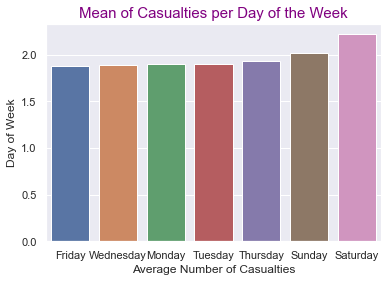

In [102]:
sns.barplot(y='Number_of_Casualties', x='Week_Name', data=df1.groupby('Week_Name')['Number_of_Casualties'].mean().reset_index().sort_values(by='Number_of_Casualties'))
plt.title("Mean of Casualties per Day of the Week", fontsize = 15, color = 'purple')
plt.ylabel("Day of Week")
plt.xlabel("Average Number of Casualties")
plt.show()

### 4. Derived Features/Metrics

We can oberve that most of the accidents happens on weekdays and also during working hours i.e. between 8 AM to 6 PM. However, Weends have more number of casualties compare to week days. There is a possibility that people might be travelling on a bigger vehicles on weekends and meeting an acciendt. One more thing, the visualization, somehow, is not so appealing. So, we will try to plot the same graphs a 24 Hour clock graph. For that, we need to some background back like creating the readiant for the time values. Let's do that!

In [108]:
def get_radian(x):
    
    return 2 * np.pi * (x/24)

In [134]:
df_temp = df1.groupby('Hour')['Number_of_Casualties'].sum().reset_index()
df_temp

,Hour,Number_of_Casualties
0,0,6499.0
1,1,4858.0
2,2,2663.0
3,3,2204.0
4,4,2070.0
5,5,2939.0
6,6,7176.0
7,7,21296.0
8,8,30187.0
9,9,21144.0


In [125]:
time_radiant = df_temp.Hour.apply(get_radian)
time_radiant.head()

0    0.000000
1    0.261799
2    0.523599
3    0.785398
4    1.047198
Name: Hour, dtype: float64

In [151]:
#  Write a function to plot the polar or Radial graph

def plot_by_time_of_the_day(df, time_col_name, plot_col_name, plot_title=None):
    
    fig = plt.figure(figsize=(8, 8))
    time_rad = df.Hour.apply(get_radian)
    ax = plt.subplot(111, projection='polar')
    ax.bar(time_rad, df[plot_col_name], width=0.2, color='red')

    # clockwise labels
    ax.set_theta_direction(-1)

    # place Zero at 12AM
    ax.set_theta_offset(np.pi / 2)

    # set circumference ticks
    ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
    
    # set the label names
    ticks = [
        '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM',
        '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM',
        '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'
    ]
    ax.set_xticklabels(ticks)

    # suppress the radial labels
    plt.setp(ax.get_yticklabels(), visible=False)

    # Radius
    plt.ylim(0, max(df[plot_col_name]))
    plt.title(plot_title, fontsize = 15, color = 'purple')
    plt.show()



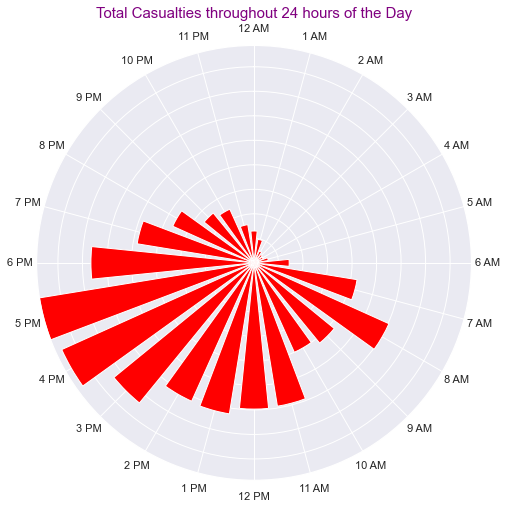

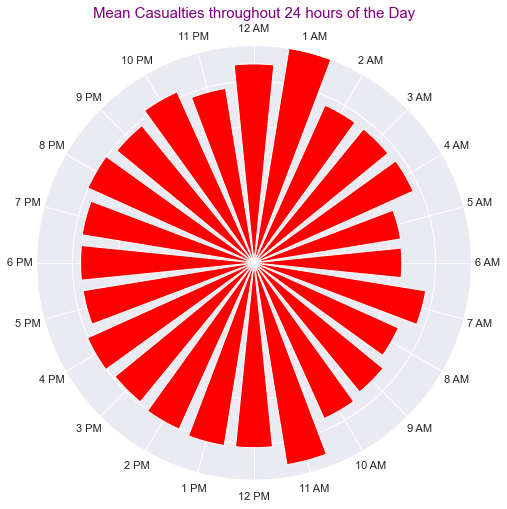

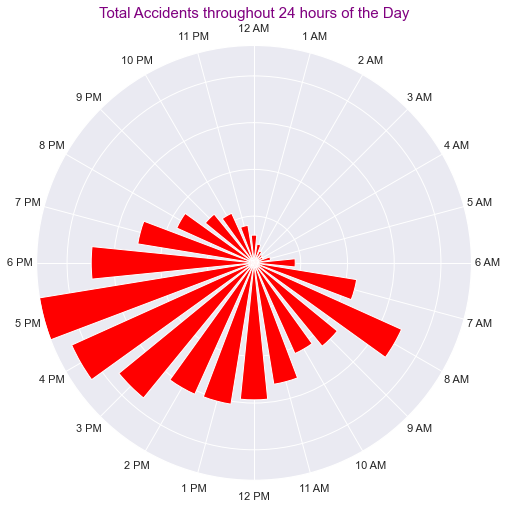

In [152]:
df11 = df1.groupby('Hour')['Number_of_Casualties'].sum().reset_index()
df12 = df1.groupby('Hour')['Number_of_Casualties'].mean().reset_index()
df13 = df1.groupby('Hour')['Accident_Index'].count().reset_index()

plot_by_time_of_the_day(df11, 'Hour', 'Number_of_Casualties', 'Total Casualties throughout 24 hours of the Day')
plot_by_time_of_the_day(df12, 'Hour', 'Number_of_Casualties', 'Mean Casualties throughout 24 hours of the Day')
plot_by_time_of_the_day(df13, 'Hour', 'Accident_Index', 'Total Accidents throughout 24 hours of the Day')

This looks much better. We can see that accidents are higher around 4 PM and 5 PM, but mean casuality is higher during night i.e.e at 11 AM and 1 AM.

### 5. Conclusion

In this notebook, we looked at some of the practical aspects that should be considered while performing an EDA. We started by investigating the dataset from a data structure and data quality perspective. We discussed some of the steps to address some of the data quality issues. Then we started analyzing the data content, its distribution, and correlation among various numerical features keeping **Number of Accidents** and **Number of Casualities** in mind. However, these are certainly not all the possible data cleaning steps and content investigation one could do. 
It must be noted that a proper and detailed EDA is a time-consuming process. We often say that 80% of any data science project is data preparation and EDA. However, EDA must be performed keeping the business problem in mind and exploiting the domain expertise. Please remember that a clean and relevant dataset is more likely to yield a good model. 